In [118]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Problem Statement:
Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.

To create the scatter plot first create a new DataFrame using the groupby() method to aggregate and find the median salary and job count for each job title.
Annotate each point with the job title name.

Hint:
Use the .plot() method of the grouped DataFrame to create the scatter plot and plt.text() for labeling each point.

In [119]:
#df_new = df.groupby('job_title_short')['salary_year_avg'].agg(['median', 'count'])
df_new = df.groupby('job_title_short').agg(median_salary_year_avg=('salary_year_avg', 'median'), job_count=('job_title_short', 'count')).dropna()
df_new

,median_salary_year_avg,job_count
job_title_short,,
Business Analyst,85000.0,49063
Cloud Engineer,90000.0,12331
Data Analyst,90000.0,196075
Data Engineer,125000.0,186241
Data Scientist,127500.0,172286
Machine Learning Engineer,106415.0,14080
Senior Data Analyst,111175.0,29216
Senior Data Engineer,147500.0,44563
Senior Data Scientist,155500.0,36957


C:\Users\Korisnik\AppData\Local\Temp\ipykernel_23212\1526660463.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_new['job_count'][i], df_new['median_salary_year_avg'][i], df_new.index.to_list()[i], fontsize=8, ha='center')


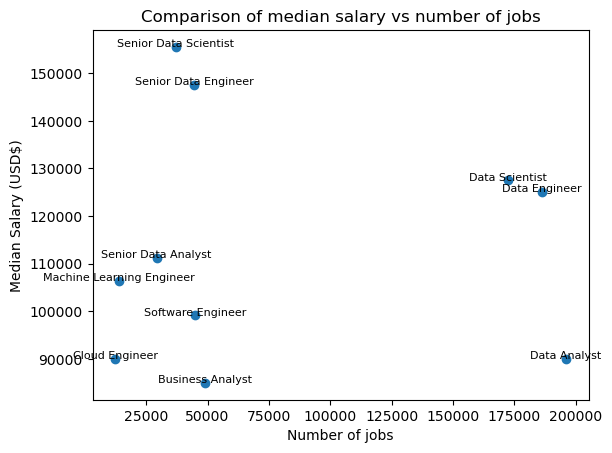

In [120]:
plt.scatter(df_new['job_count'], df_new['median_salary_year_avg'])
for i in range(len(df_new)):
    plt.text(df_new['job_count'][i], df_new['median_salary_year_avg'][i], df_new.index.to_list()[i], fontsize=8, ha='center')
plt.xlabel('Number of jobs')
plt.ylabel('Median Salary (USD$)')
plt.title('Comparison of median salary vs number of jobs')
plt.show()

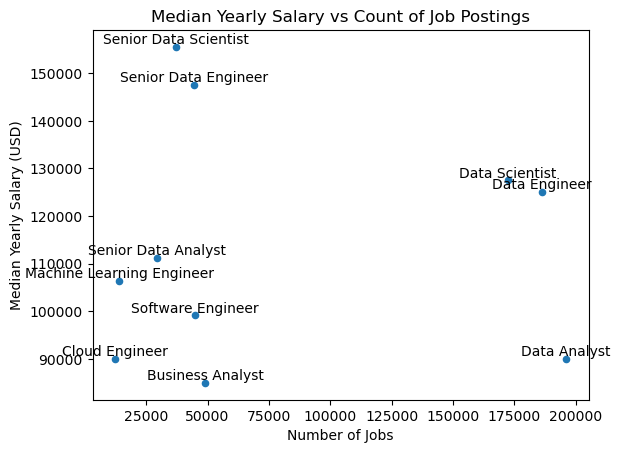

In [121]:
# Group data by job title and calculate average yearly salary and job count
job_title_stats = df.groupby('job_title_short').agg(
   median_salary_year_avg=('salary_year_avg', 'median'),
   job_count=('job_title_short', 'count')
).dropna()

# Plotting the results
job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point
for i in range(len(job_title_stats)):
   job_count = job_title_stats['job_count'].iloc[i]
   mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
   job_title = job_title_stats.index[i]
   plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

Problem Statement:
Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on highest number of job postings. Annotate each point with the country's name.

Hint:
Use the .plot() method of the grouped DataFrame to create the scatter plot, and the plt.text() function to add annotations for each data point.

In [122]:
df_countries = df.groupby('job_country').agg(job_count=('job_title_short', 'count'), median_yearly_salary=('salary_year_avg', 'median')).dropna()
top_7 = df_countries.sort_values(by='job_count', ascending=False).head(7)
top_7

,job_count,median_yearly_salary
job_country,,
United States,206292,119187.5
India,51088,111175.0
United Kingdom,40375,104668.0
France,39922,97444.0
Germany,27694,111175.0
Spain,25100,98391.5
Singapore,23696,100500.0


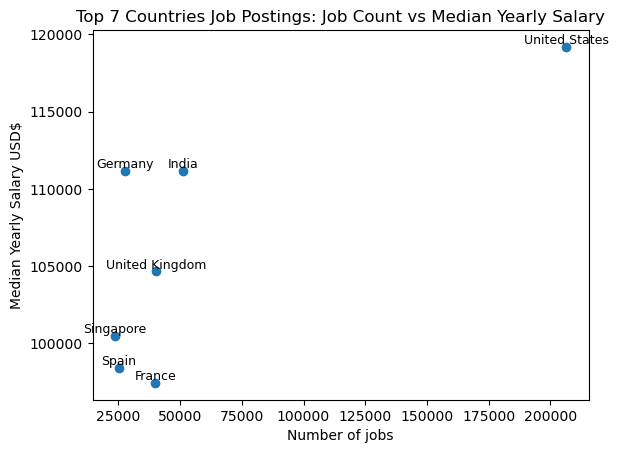

In [123]:
plt.scatter(x=top_7['job_count'], y=top_7['median_yearly_salary'])

for i in range(len(top_7)):

    plt.text(top_7['job_count'].iloc[i],
             top_7['median_yearly_salary'].iloc[i],
             top_7.index[i],
             ha='center',
             va='bottom',
             fontsize=9
             )

plt.title('Top 7 Countries Job Postings: Job Count vs Median Yearly Salary')
plt.xlabel('Number of jobs')
plt.ylabel('Median Yearly Salary USD$')
plt.show()

Problem Statement:
1. Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
 - Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
 - United States for the job_country
 - 'Full-time' and 'Contractor' for the job_schedule_type
 - Remove roles that do not have any yearly salary data.
2. Combine the job_title_short and job_schedule_type into one column (called job_title_type) in the newly created DataFrame to use as the labels for the plot.
3. For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
4. Ensure the legend is appearing.
5. Label the plot's axis and title appropriately.

Hint:
Use the plt.scatter() function to generate the scatter plot, employing the label parameter to differentiate between the different job titles and job types.

In [124]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

In [155]:
df_data_jobs = df[df['job_title_short'].isin(target_job_titles)] # Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
df_data_jobs_US = df_data_jobs[df_data_jobs['job_country'] == 'United States'] # United States for the job_country
df_data_jobs_US_sch = df_data_jobs_US[df_data_jobs_US['job_schedule_type'].isin(['Full-time', 'Contractor'])] # 'Full-time' and 'Contractor' for the job_schedule_type
df_data_jobs_US_sch = df_data_jobs_US_sch.dropna(subset=['salary_year_avg']).copy() # Remove roles that do not have any yearly salary data.
df_data_jobs_US_sch

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [156]:
final_data = df_data_jobs_US_sch.groupby(['job_schedule_type','job_title_short']).agg(
    average_yearly_salary=('salary_year_avg', 'mean'), 
    job_count=('job_title_short', 'count')
    ).dropna()
final_data


average_yearly_salary  job_count
job_schedule_type job_title_short                                  
Contractor        Data Analyst              87027.197142        111
                  Data Engineer            117772.326225         74
                  Data Scientist           118568.074155         61
Full-time         Data Analyst              95072.545202       4097
                  Data Engineer            133804.432239       2759
                  Data Scientist           140848.379828       4325

In [157]:
final_data.reset_index(inplace=True)
final_data['job_title_type'] = final_data['job_title_short'] + ' - ' + final_data['job_schedule_type']
final_data

,job_schedule_type,job_title_short,average_yearly_salary,job_count,job_title_type
0,Contractor,Data Analyst,87027.197142,111,Data Analyst - Contractor
1,Contractor,Data Engineer,117772.326225,74,Data Engineer - Contractor
2,Contractor,Data Scientist,118568.074155,61,Data Scientist - Contractor
3,Full-time,Data Analyst,95072.545202,4097,Data Analyst - Full-time
4,Full-time,Data Engineer,133804.432239,2759,Data Engineer - Full-time
5,Full-time,Data Scientist,140848.379828,4325,Data Scientist - Full-time


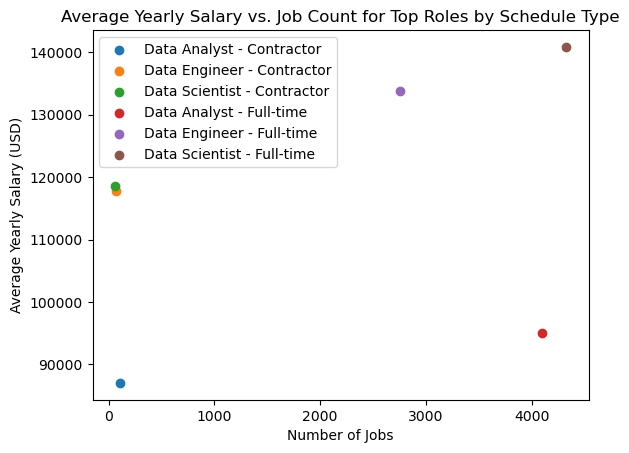

In [158]:
#for job in final_data['job_title_type'].unique():
   #data_subset = final_data[final_data['job_title_type'] == job]
   #plt.scatter(data_subset['job_count'], data_subset['average_yearly_salary'], label=job)


for _, row in final_data.iterrows():
    plt.scatter(row['job_count'], row['average_yearly_salary'], label=row['job_title_type'])


plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
4. Ensure the legend is appearing.
5. Label the plot's axis and title appropriately.

In [138]:
# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
   (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

us_jobs_df


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [139]:
# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

stats

mean_salary_year_avg  job_count
job_schedule_type job_title_short                                 
Contractor        Data Analyst             87027.197142        111
                  Data Engineer           117772.326225         74
                  Data Scientist          118568.074155         61
Full-time         Data Analyst             95072.545202       4097
                  Data Engineer           133804.432239       2759
                  Data Scientist          140848.379828       4325

In [137]:
# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

stats

,job_schedule_type,job_title_short,mean_salary_year_avg,job_count,job_title_type
0,Contractor,Data Analyst,87027.197142,111,Data Analyst - Contractor
1,Contractor,Data Engineer,117772.326225,74,Data Engineer - Contractor
2,Contractor,Data Scientist,118568.074155,61,Data Scientist - Contractor
3,Full-time,Data Analyst,95072.545202,4097,Data Analyst - Full-time
4,Full-time,Data Engineer,133804.432239,2759,Data Engineer - Full-time
5,Full-time,Data Scientist,140848.379828,4325,Data Scientist - Full-time


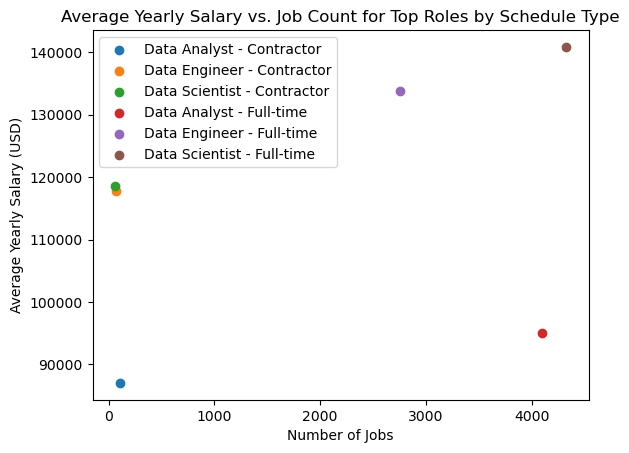

In [135]:
# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()